# 1. Introduction

### 1.1 About the problem
There is a need to develop a software product that can detect if a student succeeds in a course he/she has taken or not. If the likelihood of a student being unsuccessful in his/her course is detected early, then the college can provide him the needed support to help him succeed. 


### 1.2 - The Dataset Source

The dataset was obtained from the course shell. 
This dataset contains students records that contain 

### 1.3 General Information
Original format: excel sheet

**Dataset shape**: 668 x 39 (rows x columns)


**Categorical Features**

_INTAKE TERM CODE	
_INTAKE COLLEGE EXPERIENCE	
_SCHOOL CODE	
_PROGRAM LONG NAME	
_STUDENT LEVEL NAME	
_STUDENT TYPE NAME	
_STUDENT TYPE GROUP NAME	
_TIME STATUS NAME	
_RESIDENCY STATUS NAME	
_FUNDING SOURCE NAME	
_MAILING CITY NAME	
_MAILING POSTAL CODE GROUP 3	
_MAILING POSTAL CODE	
_MAILING PROVINCE NAME	
_GENDER	
_DISABILITY IND	
_MAILING COUNTRY NAME	
_CURRENT STAY STATUS	
_ACADEMIC PERFORMANCE	
_SUCCESS LEVEL	
_FIRST YEAR PERSISTENCE COUNT	
_HS AVERAGE GRADE	
_AGE GROUP LONG NAME	
_FIRST GENERATION IND	
_APPL FIRST LANGUAGE DESC	
_APPL EDUC INST TYPE NAME	
_APPLICANT CATEGORY NAME	
_APPLICANT TARGET SEGMENT NAME	
_PREV EDU CRED LEVEL NAME

**Composite column**
_FUTURE TERM ENROL


**Numeric features **
_ ID 2	
_RECORD COUNT
_PRIMARY PROGRAM CODE
_PROGRAM SEMESTERS	
_TOTAL PROGRAM SEMESTERS	
_EXPECTED GRAD TERM CODE	
_HS AVERAGE MARKS
_ENGLISH TEST SCORE	

**Ordinal Numerical Features**
_ADMIT TERM CODE


**Libraries used**
- sklearn
- scipy
- matplotlib
- seaborn
- Tensorflow
- keras


# 2. Data Analysis

Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
dataset = pd.read_excel('./data/HYPE Dataset for Group Project.xlsx', sheet_name='HYPE-Retention')
print(f'the shape of data = {dataset.shape}')

dataset.drop(dataset[dataset['SUCCESS LEVEL'] == 'In Progress'].index, inplace=True)

the shape of data = (668, 39)


Let us get a feel of features and samples.

In [3]:
dataset.head()

,INTAKE TERM CODE,ADMIT TERM CODE,ID 2,RECORD COUNT,INTAKE COLLEGE EXPERIENCE,PRIMARY PROGRAM CODE,SCHOOL CODE,PROGRAM LONG NAME,PROGRAM SEMESTERS,TOTAL PROGRAM SEMESTERS,...,HS AVERAGE GRADE,HS AVERAGE MARKS,ENGLISH TEST SCORE,AGE GROUP LONG NAME,FIRST GENERATION IND,APPL FIRST LANGUAGE DESC,APPL EDUC INST TYPE NAME,APPLICANT CATEGORY NAME,APPLICANT TARGET SEGMENT NAME,PREV EDU CRED LEVEL NAME
0,200609,200609.0,88,1,New to College,6809,AS,General Arts and Science - One Year,2,2,...,B,74.0,160.0,21 to 25,NaN,English,High School,"High School, Domestic",Direct Entry,High School
1,200609,200609.0,626,1,New to College,9101,CH,Paramedic,4,4,...,A+,97.0,170.0,19 to 20,NaN,English,High School,Mature: Domestic With Post Secondary,Non-Direct Entry,Post Secondary
2,200701,200701.0,634,1,Enrolled,2719,BU,Business Administration - Human Resources,6,9,...,NaN,NaN,160.0,19 to 20,NaN,English,NaN,Mature: Domestic 19 or older No Academic History,Non-Direct Entry,Unclassified
3,200709,200709.0,755,1,New to College,1205,CH,Child and Youth Worker,6,6,...,NaN,NaN,160.0,21 to 25,NaN,English,High School,Mature: Domestic 19 or older No Academic History,Non-Direct Entry,Unclassified
4,200801,200801.0,616,1,Enrolled,6700,AS,General Arts and Science - One Year,2,2,...,NaN,NaN,160.0,26 to 30,NaN,Unknown,NaN,Mature: Domestic 19 or older No Academic History,Non-Direct Entry,Unclassified


In [4]:
dataset.columns

Index(['INTAKE TERM CODE', 'ADMIT TERM CODE', 'ID 2', 'RECORD COUNT',
       'INTAKE COLLEGE EXPERIENCE', 'PRIMARY PROGRAM CODE', 'SCHOOL CODE',
       'PROGRAM LONG NAME', 'PROGRAM SEMESTERS', 'TOTAL PROGRAM SEMESTERS',
       'STUDENT LEVEL NAME', 'STUDENT TYPE NAME', 'STUDENT TYPE GROUP NAME',
       'TIME STATUS NAME', 'RESIDENCY STATUS NAME', 'FUNDING SOURCE NAME',
       'MAILING CITY NAME', 'MAILING POSTAL CODE GROUP 3',
       'MAILING POSTAL CODE', 'MAILING PROVINCE NAME', 'GENDER',
       'DISABILITY IND', 'MAILING COUNTRY NAME', 'CURRENT STAY STATUS',
       'FUTURE TERM ENROL', 'ACADEMIC PERFORMANCE', 'EXPECTED GRAD TERM CODE',
       'SUCCESS LEVEL', 'FIRST YEAR PERSISTENCE COUNT', 'HS AVERAGE GRADE',
       'HS AVERAGE MARKS', 'ENGLISH TEST SCORE', 'AGE GROUP LONG NAME',
       'FIRST GENERATION IND', 'APPL FIRST LANGUAGE DESC',
       'APPL EDUC INST TYPE NAME', 'APPLICANT CATEGORY NAME',
       'APPLICANT TARGET SEGMENT NAME', 'PREV EDU CRED LEVEL NAME'],
      dtype='o

## 2.1 Analyse Missing Values
Next, let us compute the percentage of Missing values and the percentage of Unique values for all features in the data.

In [6]:
allcolumns = dataset.columns

unique_counts = []
unique_percentage_counts = []
missing_counts = []

for col in allcolumns:
    unique_counts.append(dataset[col].nunique())
    unique_percentage_counts.append(round((dataset[col].nunique() * 100)/dataset.shape[0],3))
    missing_counts.append(round((dataset[col].isna().sum() * 100)/dataset.shape[0],3))
    

data = {'Feature': allcolumns, '% of unique values': unique_percentage_counts, 
        '% of Missing values': missing_counts}
df_counts  = pd.DataFrame.from_dict(data)

df_counts.sort_values(by='% of Missing values', ascending=False)
# df_counts.sort_values(by='% of unique values', ascending=False)

,Feature,% of unique values,% of Missing values
30,HS AVERAGE MARKS,11.006,68.121
29,HS AVERAGE GRADE,1.708,68.121
33,FIRST GENERATION IND,0.380,62.239
35,APPL EDUC INST TYPE NAME,0.190,57.306
31,ENGLISH TEST SCORE,1.518,3.036
38,PREV EDU CRED LEVEL NAME,0.569,0.569
36,APPLICANT CATEGORY NAME,0.949,0.569
34,APPL FIRST LANGUAGE DESC,0.569,0.569
32,AGE GROUP LONG NAME,1.328,0.569
22,MAILING COUNTRY NAME,0.190,0.380


From the above output, following features will be dropped:
1.  Drop 'INTAKE TERM CODE', 'RECORD COUNT', 'PRIMARY PROGRAM CODE', 'STUDENT TYPE NAME', 'STUDENT TYPE GROUP NAME', 'MAILING CITY NAME', 'MAILING POSTAL CODE GROUP 3', 'MAILING POSTAL CODE', 'MAILING PROVINCE NAME', 'EXPECTED GRAD TERM CODE', 'FIRST GENERATION IND', 'APPL EDUC INST TYPE NAME', 'PROGRAM LONG NAME' because they contain too many unique values or contain too many null values or they  donot influence our predictor variable-SUCCESS LEVEL.
2. Drop APPL FIRST LANGUAGE DESC because 57% of values are UNKNOWN or Blank. Rest is English. 
3. Impute MAILING COUNTRY NAME:  We found that the rows that contain MAILING COUNTRY NAME as NA belong to CANADA. We found this using CITY NAME column.
4. Impute ENGLISH TEST SCORE: As this is a numeric field. We will impute using mean value.
5. Impute PREV EDU CRED LEVEL NAME: As this is a categorical field, we will impute this with mode.
6. Impute APPLICANT CATEGORY NAME: As this is a categorical field, we will impute this with mode.
7. Impute AGE GROUP LONG NAME:  As this is a categorical field, we will impute this with mode.

In [7]:
dataset.drop(columns=['HS AVERAGE MARKS', 'HS AVERAGE GRADE', 'APPL FIRST LANGUAGE DESC', ], inplace=True)
dataset['MAILING COUNTRY NAME'].fillna('Canada', inplace=True)
dataset['ENGLISH TEST SCORE'].fillna(dataset['ENGLISH TEST SCORE'].mean(), inplace=True)
dataset['PREV EDU CRED LEVEL NAME'].fillna(dataset['PREV EDU CRED LEVEL NAME'].mode()[0], inplace=True)
dataset['APPLICANT CATEGORY NAME'].fillna(dataset['PREV EDU CRED LEVEL NAME'].mode()[0], inplace=True)
dataset['AGE GROUP LONG NAME'].fillna(dataset['AGE GROUP LONG NAME'].mode()[0], inplace=True)

## 2.2 Feature Engineering
Next, convert the year and month in ADMIT TERM COD into Admit_ODD_orEVEN column. This column means if the student enrolled during an Odd or Even Term. We will also create a ADMIT YEAR column. This will help us to group the students based on ID and keep only the latest enrollment. 

In [8]:
dataset.drop(dataset[dataset['ADMIT TERM CODE'].isna() == True].index, inplace=True)
dataset['ADMIT TERM CODE'] = dataset['ADMIT TERM CODE'].astype(int)

In [9]:
dataset['ADMIT TERM CODE'].fillna(dataset['ADMIT TERM CODE'].mode(), inplace=True)
dataset['ADMIT YEAR'] = dataset['ADMIT TERM CODE'].astype(str).str[:4]

dataset['ADMIT MONTH']  = dataset['ADMIT TERM CODE'].astype(str).str[4:]
dataset['ADMIT MONTH'] =  dataset['ADMIT MONTH'].astype(int)

In [10]:
dataset = dataset.groupby(["ID 2"]).apply(lambda x: x.sort_values(["ADMIT YEAR"], ascending = False)).drop_duplicates('ID 2', keep='first').reset_index(drop=True)

 Now we can drop ID, ADMIT MONTH and ADMIT TERM CODE columns

In [11]:
dataset.drop(columns = ['ADMIT TERM CODE', 'ADMIT YEAR', 'ADMIT MONTH', 'ID 2'], inplace=True)
dataset.shape

(374, 21)

Now, we will convert the composite column _FUTURE TERM ENROL into 8 different columns after splitting based on - character

In [12]:
dataset[['Term1', 'Term2', 'Term3', 'Term4', 'Term6', 'Term5', 'Term7', 'Term8', 'Term9', 'Term10']] = dataset['FUTURE TERM ENROL'].str.split('-',  expand=True)
dataset['Term1'] = dataset['Term1'].astype(int)
dataset['Term2'] = dataset['Term2'].astype(int)
dataset['Term3'] = dataset['Term3'].astype(int)
dataset['Term4'] = dataset['Term4'].astype(int)
dataset['Term6'] = dataset['Term5'].astype(int)
dataset['Term5'] = dataset['Term6'].astype(int)
dataset['Term7'] = dataset['Term7'].astype(int)
dataset['Term8'] = dataset['Term8'].astype(int)
dataset['Term9'] = dataset['Term9'].astype(int)
dataset['Term10'] = dataset['Term10'].astype(int)

dataset.drop(columns=['FUTURE TERM ENROL'], inplace=True)

We found that CURRENT STAY STATUS has 10 categories - Left College - Enrolled 1 Term, Graduated - On Time, Left College - Enrolled 2 Terms, Graduated - Extended Time, Left College - Enrolled 3 Terms, Graduated - Different Program, Left College - Enrolled 5 or more Terms, Left College - Enrolled 4 Terms, Completed - Preparatory Program, Graduated - Different Intake. 

We can reduce these categories to  - Left College, Graduated, Completed

In [13]:
def change_STAY_STATUS(row):
    if 'Left College' in row:
        return 'Left College'
    if 'Completed' in row:
        return 'Completed'
    if 'Graduated' in row:
        return 'Graduated'

dataset['CURRENT STAY STATUS'] = dataset['CURRENT STAY STATUS'].apply(change_STAY_STATUS)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INTAKE COLLEGE EXPERIENCE      374 non-null    object 
 1   SCHOOL CODE                    374 non-null    object 
 2   PROGRAM SEMESTERS              374 non-null    int64  
 3   TOTAL PROGRAM SEMESTERS        374 non-null    int64  
 4   STUDENT LEVEL NAME             374 non-null    object 
 5   TIME STATUS NAME               374 non-null    object 
 6   RESIDENCY STATUS NAME          374 non-null    object 
 7   FUNDING SOURCE NAME            374 non-null    object 
 8   GENDER                         374 non-null    object 
 9   DISABILITY IND                 374 non-null    object 
 10  MAILING COUNTRY NAME           374 non-null    object 
 11  CURRENT STAY STATUS            374 non-null    object 
 12  ACADEMIC PERFORMANCE           374 non-null    obj

We have analysed all the columns. We can use these logic to build the pipeline. The pipeline code is in 2.pipeline.ipynb.

# 3. Find Answers to business questions

## 3.1 what is the success rate among girls and boys?


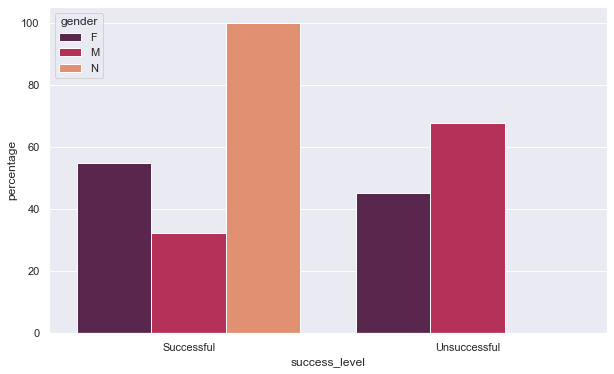

In [8]:

# sns.set(color_codes=True)
sns.set_style("darkgrid")

grouped = dataset.groupby(['GENDER'], sort=False)
success_counts = grouped['SUCCESS LEVEL'].value_counts(normalize=True, sort=False)

data = [
    {'success_level': success_level, 'gender': gender, 'percentage': percentage*100} for 
    (gender, success_level), percentage in dict(success_counts).items()
]

df1 = pd.DataFrame(data)
sns.set(rc = {'figure.figsize':(10,6)})
p = sns.barplot(x="success_level", y="percentage", hue="gender", data=df1, palette='rocket')

## 3.2 which agegroup has the highest Success and Unsuccess rate?


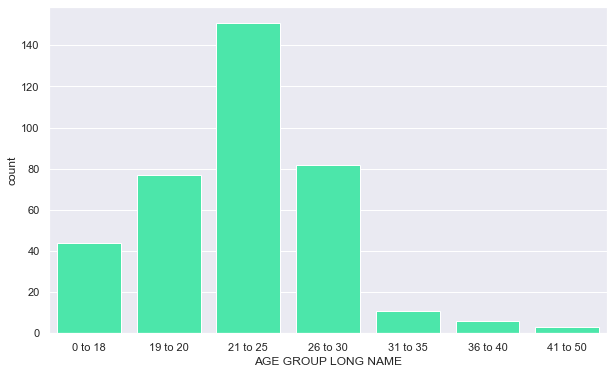

In [106]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.countplot(x="AGE GROUP LONG NAME", data=dataset, color='#33FFB0',
              order = ['0 to 18', '19 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50']);

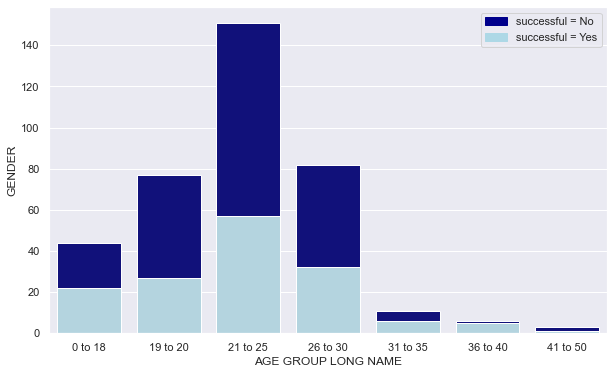

In [48]:
total = dataset.groupby('AGE GROUP LONG NAME')['GENDER'].count().reset_index()
successful = dataset[dataset['SUCCESS LEVEL']=='Successful'].groupby('AGE GROUP LONG NAME')['GENDER'].count().reset_index()

successful['total'] = [i / j * 100 for i,j in zip(successful['GENDER'], total['GENDER'])]
total['total'] = [i / j * 100 for i,j in zip(total['GENDER'], total['GENDER'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="AGE GROUP LONG NAME",  y="GENDER", data=total, color='darkblue');

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="AGE GROUP LONG NAME", y="GENDER", data=successful, color='lightblue');

# add legend
top_bar = mpatches.Patch(color='darkblue', label='successful = No');
bottom_bar = mpatches.Patch(color='lightblue', label='successful = Yes');
plt.legend(handles=[top_bar, bottom_bar]);


## 3.3. Academic performance vs. Success rate

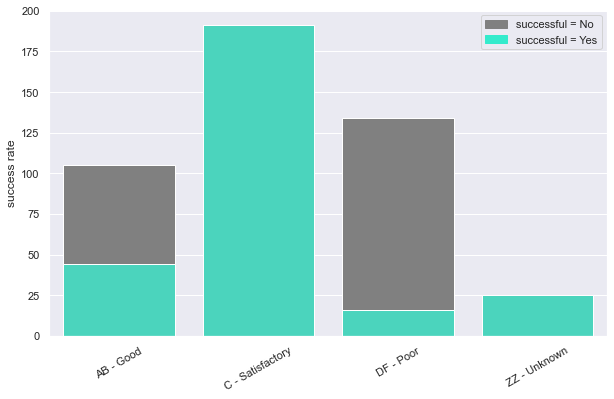

In [9]:
df_success = dataset[dataset['SUCCESS LEVEL'] == 'Unsuccessful']
df_unsuccess = dataset[dataset['SUCCESS LEVEL'] == 'Successful']


result_df = pd.DataFrame({"success":   df_success.groupby('ACADEMIC PERFORMANCE')['GENDER'].count().reset_index()['GENDER'],
                    "unsucess" : df_unsuccess.groupby('ACADEMIC PERFORMANCE')['GENDER'].count().reset_index()['GENDER'],
                    "Academic": dict(dataset['ACADEMIC PERFORMANCE'].value_counts()).keys()})


s1 = sns.barplot(x = 'Academic', y = 'unsucess', data = result_df, color='gray', 
                 order = ['AB - Good', 'C - Satisfactory', 'DF - Poor', 'ZZ - Unknown'])

s2 = sns.barplot(x = 'Academic', y = 'success', data = result_df, color='#34ebcc',
                order=['AB - Good', 'C - Satisfactory', 'DF - Poor', 'ZZ - Unknown'])

s2.set_xticklabels(s2.get_xticklabels(), rotation=30)
s2.set_xlabel('')
s2.set_ylabel('success rate')

# add legend
top_bar = mpatches.Patch(color='gray', label='successful = No');
bottom_bar = mpatches.Patch(color='#34ebcc', label='successful = Yes');
plt.legend(handles=[top_bar, bottom_bar]);


## 3.4 If Student did not  persist during First Year Persistance, is the student more unsucessful than successful?

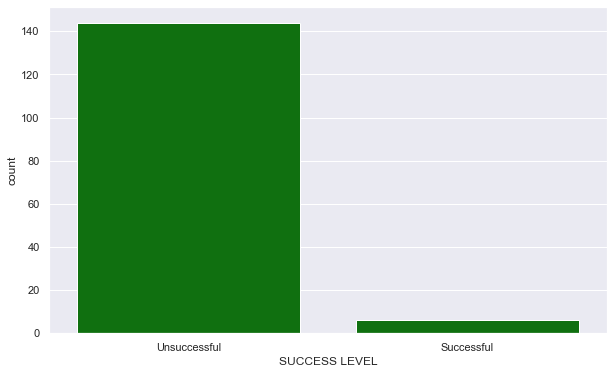

In [108]:
df_unsuccessful = dataset[dataset['FIRST YEAR PERSISTENCE COUNT'] ==0]
sns.countplot(x ='SUCCESS LEVEL' , data=df_unsuccessful, color='green');

## 3.5 Are students belonging to a particular Applicant Category Name more Successful? Which Category is least successful?

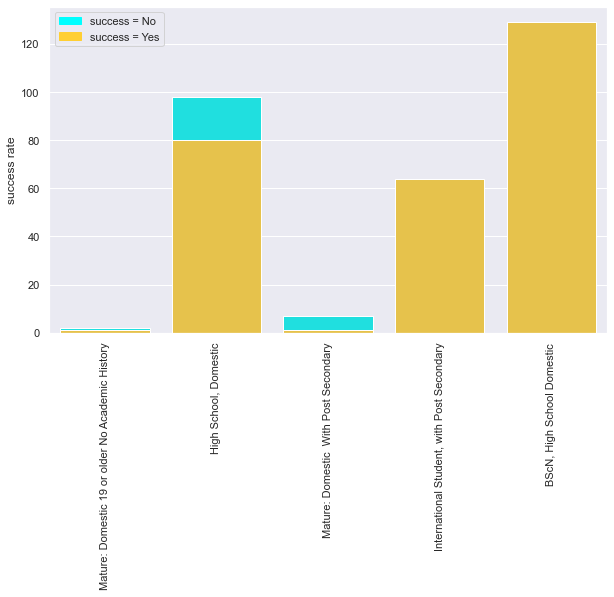

In [10]:

result_df = pd.DataFrame({"success":   df_success.groupby('APPLICANT CATEGORY NAME')['GENDER'].count().reset_index()['GENDER'],
                    "unsucess" : df_unsuccess.groupby('APPLICANT CATEGORY NAME')['GENDER'].count().reset_index()['GENDER'],
                    "Category Name": dict(dataset['APPLICANT CATEGORY NAME'].value_counts()).keys()})


s1 = sns.barplot(x = 'Category Name', y = 'unsucess', data = result_df, color='cyan')

s2 = sns.barplot(x = 'Category Name', y = 'success', data = result_df, color='#FFCF33')

s2.set_xticklabels(s2.get_xticklabels(), rotation=90)
s2.set_xlabel('')
s2.set_ylabel('success rate')

# add legend
top_bar = mpatches.Patch(color='cyan', label='success = No');
bottom_bar = mpatches.Patch(color='#FFCF33', label='success = Yes');
plt.legend(handles=[top_bar, bottom_bar]);

## 3.6 Does the Success Rate differ by Applicant Target Segment Name?

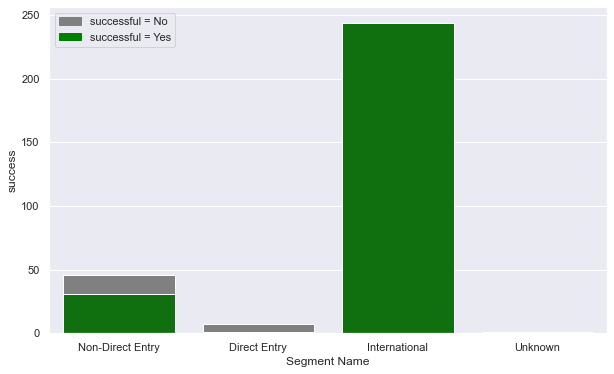

In [11]:
dataset['APPLICANT TARGET SEGMENT NAME'].value_counts()

df = pd.DataFrame({"success":   df_success.groupby('APPLICANT TARGET SEGMENT NAME')['GENDER'].count().reset_index()['GENDER'],
                    "unsucess" : df_unsuccess.groupby('APPLICANT TARGET SEGMENT NAME')['GENDER'].count().reset_index()['GENDER'],
                    "Segment Name": dict(dataset['APPLICANT TARGET SEGMENT NAME'].value_counts()).keys()})

s1 = sns.barplot(x = 'Segment Name', y = 'unsucess', data = df, color = 'gray')

s2 = sns.barplot(x = 'Segment Name', y = 'success', data = df, color = 'green')

# add legend
top_bar = mpatches.Patch(color='gray', label='successful = No');
bottom_bar = mpatches.Patch(color='green', label='successful = Yes');
plt.legend(handles=[top_bar, bottom_bar]);